In [1]:
# Import neccesary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

In [2]:
# Download dataset

!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-07-25 19:10:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... ......               100%  253K=0.1s

2020-07-25 19:10:33 (253 KB/s) - 'teleCust1000t.csv' saved [37048/37048]



In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.shape

(1000, 12)

In [8]:
# Categories for the dependent variable

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [11]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F11F1ACF8>]],
      dtype=object)

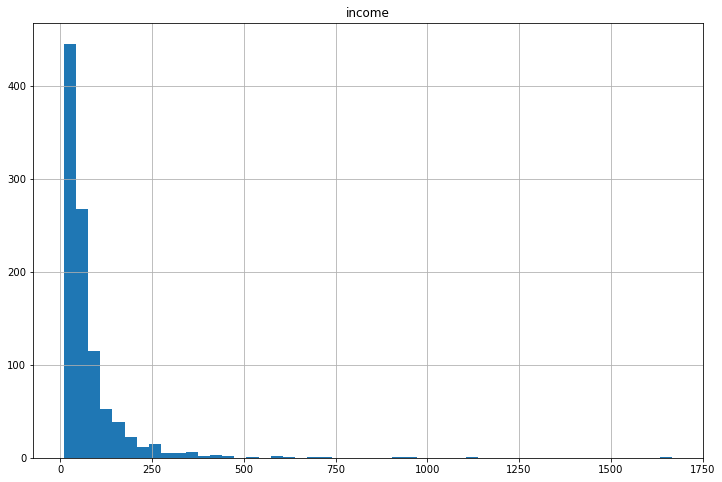

In [13]:
df.hist(column = 'income', bins = 50, figsize = (12, 8))

In [14]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
X = df[['region', 
        'tenure', 
        'age', 
        'marital', 
        'address', 
        'income', 
        'ed', 
        'employ', 
        'retire', 
        'gender', 
        'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [16]:
Y = df['custcat'].values
Y[0: 5]

array([1, 4, 3, 1, 3], dtype=int64)

In [18]:
# Normalize Data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0: 5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split  

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has **NOT** been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy to make correct predictions on unknown data. 

So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


## Classification

### K nearest neighbor (KNN)

In [21]:
# import neccesary library

from sklearn.neighbors import KNeighborsClassifier

### Training

In [48]:
k = 38 

# Train Model and Predict

neight = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neight

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

### Predicting

In [49]:
yhat = neight.predict(X_test)
yhat[0: 5]

array([3, 1, 2, 4, 4], dtype=int64)

### Accucary Evaluation

In multilabel classification, `accuracy classification score` is a function that computes subset accuracy. This function is equal to the `jaccard_similarity_score` function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [50]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neight.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.4275
Test set Accuracy:  0.41


In [27]:
Ks = 10

mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks -1))

ConfustionMx = []

for n in range(1, Ks):
    
    # Train Model an Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)
print(std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


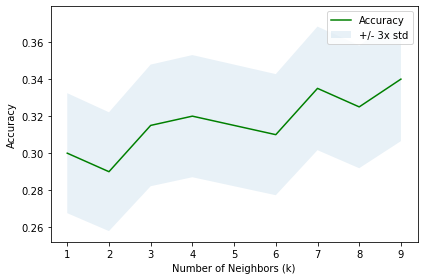

In [43]:
# Plotting the results

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3x std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [44]:
print('The best accuracy was with', mean_acc.max(), 'with k =', mean_acc.argmax() + 1)

The best accuracy was with 0.34 with k = 9
